100td 0.0025
kfactor=0.2
Pa 0.7285042829539452
kfactor=0.1
Pa 0.3642521414769726
kfactor=10
Pa 36.42521414769726


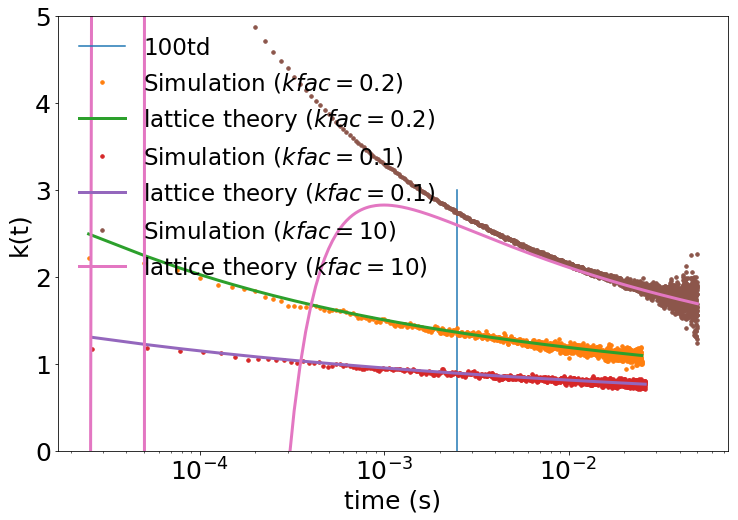

In [46]:
%matplotlib inline
from ecell4 import *
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import special
from scipy.optimize import curve_fit
from math import sqrt

rm = 0.005
factor =700
L = factor*rm        
Area=L*L
voxelr=rm       
Na=1000
Nb=1000
D=1
kd= 4.0*math.pi*D
td =(2*voxelr)**2/(4*D)
print('100td',100*td)


def calk(stsim,t,C):
    dst = (stsim[2:]-stsim[:-2])/(t[2:]-t[:-2])
    dst=np.append((stsim[1]-stsim[0])/(t[1]-t[0]),dst)
    dst=np.append(dst,(stsim[-1]-stsim[-2])/(t[-1]-t[-2])  )
    return dst/stsim/-C

def ktl(kaf,t):
    ka = kaf*kd
    Pa=ka*(2*sqrt(2)+4*sqrt(3)+3*sqrt(6)+sqrt(22))**2/(72*(6*sqrt(2)+4*sqrt(3)+3*sqrt(6)))/D
    print('Pa',Pa)
    g = 0.5772156649
    f=12*4*D*np.exp((1./Pa-1)*2*np.pi/np.sqrt(3))/(voxelr*2)**2
    A=np.log(f*t)
    t3=4*np.pi*D*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3)
    return t3    

error = lambda x,y: (x-y)*100/x

def plotk(dat,k_factor,L):    
    print('kfactor='+str(k_factor))
    #w = spatiocyte.SpatiocyteWorld(ones()*L,voxelr)
    #Ar = w.calculate_volume(ones()*L,voxelr)
    Cb=Nb/Area
    #print('Aactual',Ar,'A',Area)               
    tkt=dat[:,0]
    tst=dat[:,0]
    mnac=dat[:,1]
    stsim = mnac/Na
    ksim = calk(stsim,tkt,Cb)

#graphs
    lw=3
    fs=25
    ms=12
    ax1.plot(tkt,ksim,'.',label='Simulation ($kfac=$'+str(k_factor)+')',markersize=ms-5)
    ax1.semilogx(tkt,ktl(k_factor,tkt),'-',label='lattice theory ($kfac=$'+str(k_factor)+')',markersize=5,linewidth=lw)
    ax1.set_ylim(0,5)
    ax1.set_ylabel('k(t)',fontsize=fs)
    ax1.set_xlabel('time (s)',fontsize=fs)
    ax1.tick_params(labelsize=fs)      
    ax1.legend(loc='best',fontsize=fs-2,frameon=False)
    #ax1.set_xlim(ts[0],ts[1])       
    
fig1,ax1=plt.subplots(1,1,figsize=(12,8))
plt.plot([100*td]*10,np.linspace(0,3,10),'-',label='100td')
kfac=0.2
dat = np.loadtxt('/home/chew/outputdata/2DRD_kfac'+str(kfac)+'_1000_1000_1000',delimiter=',')
plotk(dat,kfac,700*rm)
kfac=0.1
dat = np.loadtxt('/home/chew/outputdata/2DRD_kfac'+str(kfac)+'_1000_1000_1000',delimiter=',')
plotk(dat,kfac,700*rm)
kfac=1
#dat = np.loadtxt('/home/chew/outputdata/2DRD_kfac'+str(kfac)+'_1000_1000_2000',delimiter=',')
#plotk(dat,kfac,700*rm)
kfac=10
dat = np.loadtxt('/home/chew/outputdata/2DRD_kfac'+str(kfac)+'_1000_1000_40000',delimiter=',')
plotk(dat,kfac,700*rm)

kfactor=1
Pa 3.642521414769726
Pa 3.642521414769726
Pa 3.642521414769726


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


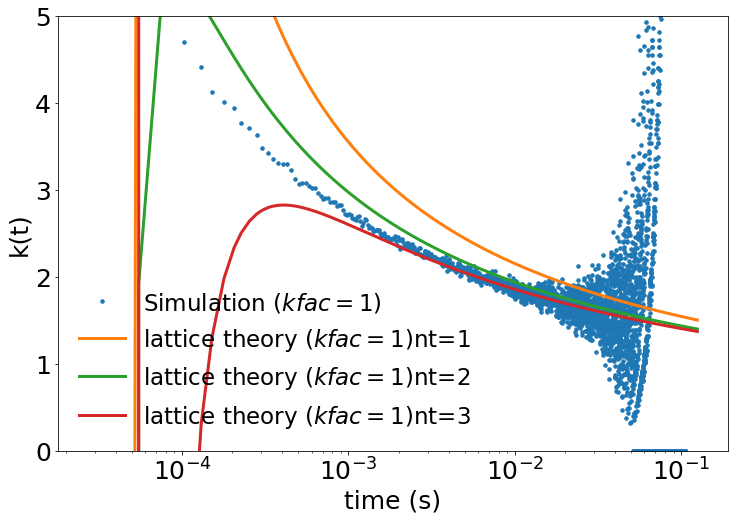

In [30]:
def ktl(kaf,t,nt):
    ka = kaf*kd
    Pa=ka*(2*sqrt(2)+4*sqrt(3)+3*sqrt(6)+sqrt(22))**2/(72*(6*sqrt(2)+4*sqrt(3)+3*sqrt(6)))/D
    print('Pa',Pa)
    g = 0.5772156649
    f=12*4*D*np.exp((1./Pa-1)*2*np.pi/np.sqrt(3))/(voxelr*2)**2
    A=np.log(f*t)
    if nt==1:
        return 4*np.pi*D*(1/A)
    elif nt==2:
        return 4*np.pi*D*(1/A-g/A**2)
    elif nt==3:
        return 4*np.pi*D*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3)

def plotk(dat,k_factor,L):    
    print('kfactor='+str(k_factor))
    #w = spatiocyte.SpatiocyteWorld(ones()*L,voxelr)
    #Ar = w.calculate_volume(ones()*L,voxelr)
    Cb=Nb/Area
    #print('Aactual',Ar,'A',Area)               
    tkt=dat[:,0]
    tst=dat[:,0]
    mnac=dat[:,1]
    stsim = mnac/Na
    ksim = calk(stsim,tkt,Cb)

#graphs
    lw=3
    fs=25
    ms=12
    ax1.plot(tkt,ksim,'.',label='Simulation ($kfac=$'+str(k_factor)+')',markersize=ms-5)
    for i in range(3):
        ax1.semilogx(tkt,ktl(k_factor,tkt,i+1),'-',label='lattice theory ($kfac=$'+str(k_factor)+')nt='+str(i+1),markersize=5,linewidth=lw)
    ax1.set_ylim(0,5)
    ax1.set_ylabel('k(t)',fontsize=fs)
    ax1.set_xlabel('time (s)',fontsize=fs)
    ax1.tick_params(labelsize=fs)      
    ax1.legend(loc='best',fontsize=fs-2,frameon=False)
    #ax1.set_xlim(ts[0],ts[1])       
    
fig1,ax1=plt.subplots(1,1,figsize=(12,8))
kfac=1
dat = np.loadtxt('/home/chew/outputdata/2DRD_kfac'+str(kfac)+'_1000_1000_1000',delimiter=',')
plotk(dat,kfac,700*rm)

In [34]:
def ll(d,f):
    return 4*d/(1./f-1)

ll(math.pi/3/2**0.5,0.256318),ll(math.pi/6,0.340537)

(1.020858260154991, 1.0815148461455326)

In [38]:
from math import pi
from math import sqrt
def er(a,b):
    return (a-b)*100/a

for kaf in [0.01,100]:
    R=0.01
    D=1
    kd=4*pi*R*D
    ka=kaf*kd
    keff=ka*kd/(ka+kd)
    d=pi/3/sqrt(2)
    P=ka*d/(pi*D*R)
    F1=0.256318
    keffl=pi*P*D*R*((1/F1-1)/(P+1/F1-1))/d
    print(keff,keffl,er(keff,keffl))

0.0012441951103325916 0.0012439382154126525 0.02064747866356678
0.12441951103325916 0.12190202184022664 2.023387788720337


In [42]:
for kaf in [0.01,100]:
    R=0.01
    D=1
    kd=4*pi*R*D
    ka=kaf*kd
    keff=ka*kd/(ka+kd)
    d=pi/6
    P=ka*d/(pi*D*R)
    F1=0.340537
    keffl=pi*P*D*R*((1/F1-1)/(P+1/F1-1))/d
    print(keff,keffl,er(keff,keffl))

0.0012441951103325916 0.001243191758007014 0.08064268355060708
0.12441951103325916 0.11512780296791023 7.468047405253924
